# WORKBOOK

* READY DATA FOR REGRESSION
* Import
* Read data 
* Look at the data
* Clean data (Remove Null values)
* Feature engineer (Transform Target, Skewness, OHC, Binary Encoding)
* Scaling data 

* FURTHER READY
* X and y data 
* Train and test split (Cross validation can be used here)
* Create poly features 
* Fit data to linear regression, ridge, lasso or elastic net 
* Predict 
* (If target has been transformed, remember to inverse transform) 



_____________________

# IMPORTS

In [329]:
# IMPORTS

# Data wrangling
import pandas as pd
import numpy as np
import re


#Visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

# Transformning target 
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox 
from scipy.special import inv_boxcox


# LOADING DATA

In [432]:
# Read data
data = pd.read_excel("Concrete_Data.xls")

# Display it
display(data)
print("")
display(data.info())

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


None

##### No null values

# INSPECTING
#####  I chose to rename the columns to something simpler, so I could better work with it. When I derive insight, I will revist the specified units

In [433]:
# Renaming
for column in data.columns:
    regex = r"[a-zA-Z ]+"
    new_name = re.findall(regex, column)[0]
    data = data.rename(columns={column:new_name})
    
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


_____________________________________

# Transforming target

No transformation
P-value: 4.9409594191780554e-08


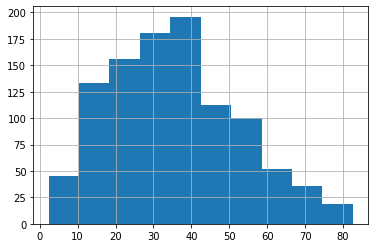

In [4]:
# Normal distributed y?
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

data['Concrete compressive strength'].hist();

print("No transformation")
print("P-value:", normaltest(data['Concrete compressive strength'].values)[1])

Log transformation
P-value: 5.0972800397373625e-26


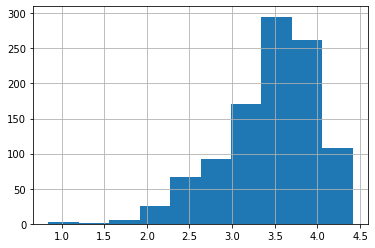

In [5]:
#Log transformation

log_concrete = np.log(data['Concrete compressive strength'])
log_concrete.hist()

print("Log transformation")
print("P-value:", normaltest(log_concrete)[1])

Sqrt transformation
P-value: 0.00022351406346099572


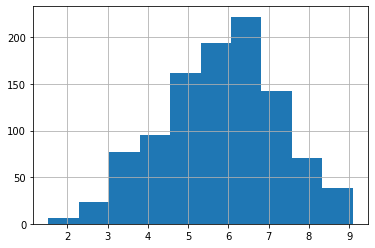

In [6]:
# SQRT transformation
sqrt_concrete = np.sqrt(data['Concrete compressive strength'])
sqrt_concrete.hist()

print("Sqrt transformation")
print("P-value:", normaltest(sqrt_concrete)[1])

Box Cox transformation
P-value: 0.00020366380084204495


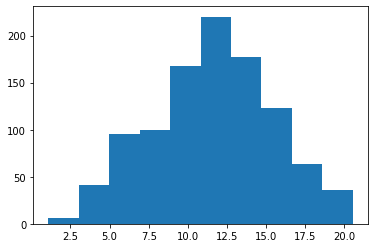

In [9]:
# Box cox 
from scipy.stats import boxcox

bc_transformation_concrete = boxcox(data['Concrete compressive strength'])
bc_transformation_result = bc_transformation_concrete[0]

plt.hist(bc_transformation_result)

print("Box Cox transformation")
print("P-value:", normaltest(bc_transformation_result)[1])

_____________________________________

# CLEANING

In [276]:
# No cleaning required? 
# Check for skewness 

# One Hot Encoding

In [ ]:
'''
# Refreshing data as it has been used a lot 
data = pd.read_excel("Concrete_Data.xls")

# Renaming
for column in data.columns:
    regex = r"[a-zA-Z ]+"
    new_name = re.findall(regex, column)[0]
    data = data.rename(columns={column:new_name})
    
#______________________________________________________#

# Select the object (string) columns
mask = data.dtypes == np.object
categorical_cols = data.columns[mask]

# Determine how many extra columns would be created
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 215 columns, assuming the original ones are dropped. 
# This is quite a few extra columns!
small_num_ohc_cols.sum()

''';

_____________________________________

# REGRESSION with boxcox

In [332]:
# Creating object of the linear regression class from sklearn
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

#### X and y

In [333]:
# X and y

y_col = 'Concrete compressive strength'

X = data.drop(y_col, axis=1)
y = data[y_col]

#### Polynomial features

In [334]:
# Creating Polynomial features 
from sklearn.preprocessing import PolynomialFeatures

#Polynomial feature object with a degree of 2, do not inlude bias as this will be added by other class 
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

#### Train test split

In [335]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size = 0.3)

#### Standard scaler

In [336]:
# Create instance of standard scaler and fit_transform
from sklearn.preprocessing import StandardScaler

# Scale X_train 
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)

#### Transforming

In [337]:
# Transforming with desired transformation 
# Box cox 
from scipy.stats import boxcox

boxcox_result = boxcox(y_train)
y_train_boxcox = boxcox_result[0]
lambda_value = boxcox_result[1]

#### Fitting and predicting

In [338]:
# Fitting the transformed train set
lr.fit(X_train_ss, y_train_boxcox)

# Transforming the X_test
X_test_ss = ss.transform(X_test)

# Predicting 
y_pred_boxcox = lr.predict(X_test_ss)

#### Inverse transformation

In [339]:
# Inverse transformation
from scipy.special import inv_boxcox

inv_boxcox(y_train_boxcox, lambda_value);

In [340]:
# Inspecting it, it adds up
print(y_train_boxcox[:10])
print(inv_boxcox(y_train_boxcox, lambda_value)[:10]) # y_train_boxcox defined under transformation along with lambda_value
print(y_train[:10].values)

[ 1.72874071  7.84237167 11.08970801 14.63246096 15.44604679 11.05990693
 14.52627897 10.11312938  9.460016   11.35765852]
[ 3.31982694 19.41564416 32.23989776 49.24927068 53.57917996 32.10988228
 48.69562145 28.096147   25.46096973 33.41890172]
[ 3.31982694 19.41564416 32.23989776 49.24927068 53.57917996 32.10988228
 48.69562145 28.096147   25.46096973 33.41890172]


#### R^2 with boxcox

In [341]:
# Look at performance
from sklearn.metrics import r2_score

y_pred_inv_tran = inv_boxcox(y_pred_boxcox, lamda_value)
r2_score(y_pred_inv_tran, y_test)

0.7614140704460655

#### R^2 without boxcox

In [342]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)
lr_pred = lr.predict(X_test_ss)
r2_score(lr_pred,y_test)

0.7500191629764154

_____________________________________

# REGRESSION with Cross Validation

#### Imports

In [343]:
# Imports
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline


#### Define X and y

In [344]:
# X and y

y_col = 'Concrete compressive strength'

X = data.drop(y_col, axis=1)
y = data[y_col]

#### K-Fold

In [345]:
# K-fold instance
kf = KFold(shuffle=True, n_splits=3)

#### Seeing how kf.split() works

In [346]:
# Different training sets
for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 0  2  3  4  6  8 10 11 12 13] 686
Test index: [ 1  5  7  9 25 26 28 29 32 33] 344

Train index: [ 0  1  4  5  6  7  8  9 13 14] 687
Test index: [ 2  3 10 11 12 16 18 19 21 23] 343

Train index: [ 1  2  3  5  7  9 10 11 12 16] 687
Test index: [ 0  4  6  8 13 14 15 17 20 22] 343



#### Cross validation without standard scaling

In [347]:
# Creating a list for scores to be appended to and creating an object of LinearRegression
scores = []
lr = LinearRegression()

# Looping over training sets to find optimal training set
for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    lr.fit(X_train, y_train)
        
    y_pred = lr.predict(X_test)

    score = r2_score(y_test.values, y_pred)
    
    scores.append(score)
    
scores

[0.5943992866549561, 0.6180237722223372, 0.5836818840341299]

#### Cross validation with standard scaling

In [348]:
# Creating a list for scores to be appended to and creating an object of LinearRegression and of StandardScaler
scores = []
lr = LinearRegression()
ss = StandardScaler()

# Looping over training sets to find optimal training set
for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    X_train_ss = ss.fit_transform(X_train)
    
    lr.fit(X_train_ss, y_train)
    
    X_test_ss = ss.fit_transform(X_test)
        
    y_pred = lr.predict(X_test_ss)

    score = r2_score(y_test.values, y_pred)
    
    scores.append(score)
    
scores

[0.6113708318073034, 0.5685539992788899, 0.6348721030857456]

# Predictions vs actual

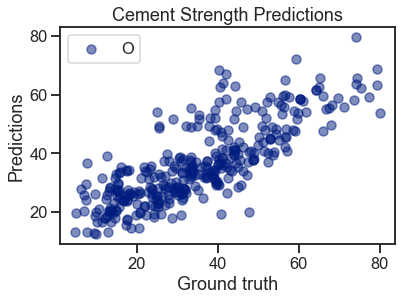

In [350]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Setting style
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

# Creating plot 
ax = plt.axes()

# Plotting values
ax.scatter(y_test, y_pred, alpha=.5)

# Decorate the plot
ax.set(xlabel="Ground truth", ylabel="Predictions", title="Cement Strength Predictions");
ax.legend("One example")

# Pipeline

In [47]:
# Pipeline
from sklearn.pipeline import Pipeline

estimator = Pipeline([("scaler", ss),
                      ("regression", lr)])

# Predicting with pipeline 
preds = cross_val_predict(estimator, X, y, cv=kf) # The K-Fold object defined earlier is passed in as Cross Validator 

# R2
r2_score(y, preds)

0.6059306239066472

_____________________________________

# Regularization

#### Imports

In [392]:
# IMPORTS

# Data wrangling
import pandas as pd
import numpy as np
import re

#Visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures


# Transformning target 
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox 
from scipy.special import inv_boxcox

# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

#### Import data again

In [393]:
# Read data
data = pd.read_excel("Concrete_Data.xls")

# Renaming
for column in data.columns:
    regex = r"[a-zA-Z ]+"
    new_name = re.findall(regex, column)[0].strip()
    data = data.rename(columns={column:new_name})
    
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


#### Split to train and test set 

In [394]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

#### Check for skewness

In [395]:
# Create a list of float colums to check for skewing
mask = data.dtypes == np.float
float_cols = data.columns[mask]

# 
skew_limit = 0.75
skew_vals = train[float_cols].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols


,Skew
Superplasticizer,0.954287
Blast Furnace Slag,0.794981


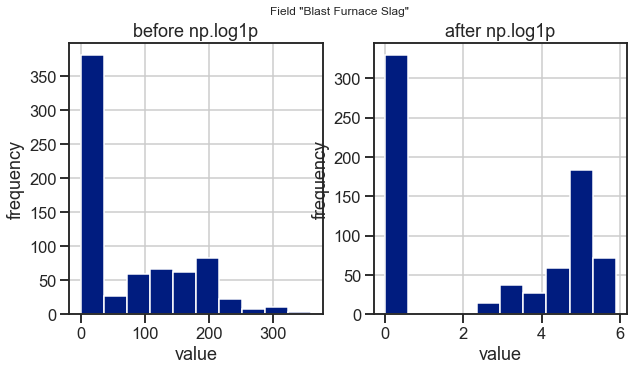

In [396]:
# Plotting histocgrams to check look at the effect of np.log1p

field = "Blast Furnace Slag"
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
train[field].hist(ax=ax_before)
train[field].apply(np.log1p).hist(ax=ax_after)
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [397]:
skew_1 = train[field].skew(),
skew_2 = train[field].apply(np.log1p).skew()
print(skew_1, skew_2)

(0.794980885889955,) -0.03034959600270239


In [398]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

#Apply np.log1p
y_col = 'Concrete compressive strength'

for col in skew_cols.index.tolist():
    if col == y_col:
        continue
    train[col] = train[col].apply(np.log1p)
    test[col]  = test[col].apply(np.log1p) 

#### Define X and y

In [399]:
# X and y 

# Train
X_train = train.drop('Concrete compressive strength', axis=1)
y_train = train['Concrete compressive strength']

# Test 
X_test = test.drop('Concrete compressive strength', axis=1)
y_test = test['Concrete compressive strength']

#### RMSE

In [400]:
# Setting up a function to calculate root mean squared error from mean squared error 

# Import 
from sklearn.metrics import mean_squared_error

def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

# Using rmse 
linear_regression = LinearRegression()
linear_regression = linear_regression.fit(X_train, y_train)
linear_regression_rmse = rmse(y_test, linear_regression.predict(X_test))

#### GridsearchCV, Ridge

In [403]:
from sklearn.linear_model import RidgeCV

# Define alphas to try out
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80] 

# Create ridgecv object
ridgeCV = RidgeCV(alphas=alphas, cv=4).fit(X_train, y_train)

# Use the rmse function to calculate
ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print("Chosen alpha: ", ridgeCV.alpha_, '\nRMSE for the chosen alpha: ', ridgeCV_rmse)

Chosen alpha:  5.0 
RMSE for the chosen alpha:  10.491699864177178


#### GridsearchCV, lasso

In [404]:
from sklearn.linear_model import LassoCV

# Define alphas to try out 
alphas2 = np.array([1e-6, 5e-5, 1e-5, 5e-5, 0.0001, 0.0005])

# Create lassocv object
lassoCV = LassoCV(alphas=alphas2, max_iter=5e4, cv=3).fit(X_train, y_train)

# Use the rmse function to calculate
lassoCV_rmse = rmse(y_test, lassocv.predict(X_test))

print("Chosen alpha: ", lassoCV.alpha_, '\nRMSE for the chosen alpha: ', lassoCV_rmse)

Chosen alpha:  1e-06 
RMSE for the chosen alpha:  10.501979461741596


#### Coefficients

In [405]:
len(ridgeCV.coef_), len(ridgeCV.coef_.nonzero()[0])

(8, 8)

In [406]:
len(lassoCV.coef_), len(lassoCV.coef_.nonzero()[0])

(8, 8)

Conclusion, all are important 

#### Elasticnet

In [375]:
from sklearn.linear_model import ElasticNetCV

# Define alphas to try out 
l1_ratios = np.linspace(0.1, 0.9, 9)

# Create Elasticnetcv object
elasticNetCV = ElasticNetCV(alphas = alphas2, l1_ratio = l1_ratios, max_iter=5e4).fit(X_train, y_train)

# Use rsme function to calculate 
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print("Chosen alpha: ", elasticNetCV.alpha_, '\nChosen ratio', elasticNetCV.l1_ratio_, '\nRMSE for the chosen alpha: ', elasticNetCV_rmse)


Chosen alpha:  0.0001 
Chosen ratio 0.1 
RMSE for the chosen alpha:  10.501839742515173


#### Overview of RMSE scores

In [419]:
# List of rmse values calculated earlier. Make labels for dataframe
rmse_vals = [linear_regression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]
labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

# Make series and then to dataframe. Give them the labels defined earlier 
rmse_df = pd.Series(rmse_vals, index = labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)

rmse_df

,RMSE
Linear,10.501980
Ridge,10.491700
Lasso,10.501979
ElasticNet,10.501840


_____________________________________

In [420]:
new_rmses

{'Linear': 216862552970748.47,
 'Lasso': 161827575100955.66,
 'Ridge': 731669736457195.6,
 'ElasticNet': 598301018929380.0}

# Gradient descent 

In [427]:
# Import SGDRegressor and prepare the parameters

from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD
Linear,10.501980,1.840828e+14
Ridge,10.491700,9.831019e+14
Lasso,10.501979,7.942874e+13
ElasticNet,10.501840,1.101965e+14


In [431]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor


# Dictionary with parameters for easier application 
model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

# Scale train and test 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Try the different regressions with stochastic gradient descent
new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD'] = pd.Series(new_rmses)
    
# Try the different regressions with scaled data and stochastic gradient descent 
new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)    
    
# Look at the values 
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-scaled
Linear,10.501980,8.218363e+13,10.666293
Ridge,10.491700,7.332846e+14,16.487528
Lasso,10.501979,1.347871e+15,10.668322
ElasticNet,10.501840,2.986471e+14,10.673202


_____________________________________

# Regularization also

In [ ]:
# This is where I started 

#### Polynomial features

In [174]:
# Setup the polynomial features
pf = PolynomialFeatures(degree = 2)

# Create the features and fit the model
X_poly = pf.fit_transform(X_data)

#### Ridge and Lasso regression

In [170]:
# The linear regression model
linearr = LinearRegression()
linearr = linearr.fit(X_poly, Y_data)
Y_pred = lr.predict(X_poly)

# The ridge regression model
ridger = Ridge(alpha=100000, max_iter=100000)
rr = rr.fit(X_poly, Y_data)
Y_pred_rr = rr.predict(X_poly)

# The lasso regression model
lassor = Lasso(alpha=0.0001)
lassor = lassor.fit(X_poly, Y_data)
Y_pred_lassor = lassor.predict(X_poly)

#### R^2 

In [171]:
print("Linear regression: ", r2_score(Y_data, Y_pred))
print("Ridge regression: ", r2_score(Y_data, Y_pred_rr))
print("Lasso regression: ", r2_score(Y_data, Y_pred_lassor))

Linear regression:  0.8106161911392379
Ridge regression:  0.7965934343279373
Lasso regression:  0.7997654357984418


#### Coefficients

In [133]:
# let's look at the absolute value of coefficients for each model

# Create dataframe to better look at values
coefficients = pd.DataFrame()

# Add the columns 
coefficients['linear regression'] = lr.coef_.ravel()
coefficients['ridge regression'] = rr.coef_.ravel()
coefficients['lasso regression'] = lassor.coef_.ravel()

# .applymap() applies to all elements in dataframe, here we take the absolute value 
coefficients = coefficients.applymap(abs)

# Describe the columns
coefficients.describe()  # Huge difference in scale between non-regularized vs regularized regression

,linear regression,ridge regression,lasso regression
count,4.500000e+01,45.000000,45.000000
mean,1.305370e+00,1.304199,0.065988
std,5.087517e+00,5.082179,0.271669
min,7.653104e-10,0.000000,0.000000
25%,3.609082e-04,0.000361,0.000087
50%,1.005644e-03,0.001005,0.000209
75%,1.224232e-02,0.012229,0.001967
max,3.117835e+01,31.142481,1.795220


#### Displaying coefficients 

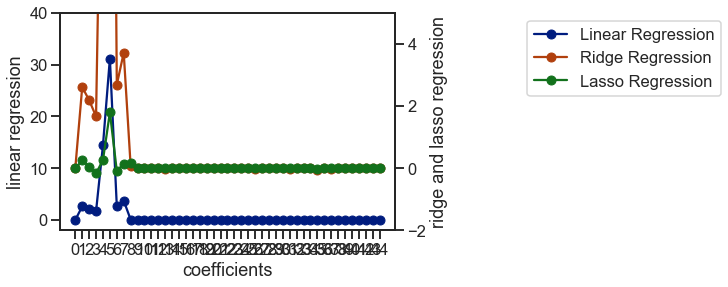

In [152]:
color = sns.color_palette()

# Create axes
ax1 = plt.axes()
ax2 = ax1.twinx()

# Plot coefficients 
ax1.plot(lr.coef_.ravel(), color=color[0], label="Linear Regression", marker="o")
ax2.plot(rr.coef_.ravel(), color=color[1], label="Ridge Regression", marker="o")
ax2.plot(lassor.coef_.ravel(), color=color[2], label="Lasso Regression", marker="o")

# Customize scales 
ax1.set_ylim(-2, 40)
ax2.set_ylim(-2, 5)

# Legend
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, bbox_to_anchor=(2, 1))

ax1.set(xlabel='coefficients',ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

ax1.set_xticks(range(len(lr.coef_)));